In [3]:
import pandas as pd
import matplotlib.pyplot as plt

reported_numbers_df = pd.read_excel('System2_Restaurant Case Study Data.xlsx', sheet_name='Reported Numbers')
txn_data_df = pd.read_excel('System2_Restaurant Case Study Data.xlsx', sheet_name='Txn Data')
panel_stats_df = pd.read_excel('System2_Restaurant Case Study Data.xlsx', sheet_name='Panel Stats')

reported_numbers_summary = reported_numbers_df.describe()
txn_data_summary = txn_data_df.describe()
panel_stats_summary = panel_stats_df.describe()

In [4]:
txn_data_new = pd.read_excel("System2_Restaurant Case Study Data.xlsx", sheet_name='Txn Data')
panel_stats = pd.read_excel("System2_Restaurant Case Study Data.xlsx", sheet_name='Panel Stats')
panel_stats['optimized_transaction_date'] = pd.to_datetime(panel_stats['optimized_transaction_date'])
txn_data_new['optimized_transaction_date'] = pd.to_datetime(txn_data_new['optimized_transaction_date'])

merged_data = pd.merge(txn_data_new, panel_stats, on='optimized_transaction_date', how='left')
merged_data

,entity,optimized_transaction_date,captured_spend,num_txns,num_panelists
0,TXRH,2016-09-01,143013.36,3380,3222140
1,TXRH,2016-09-02,236948.62,3980,3320069
2,TXRH,2016-09-03,42400.80,853,628425
3,TXRH,2016-09-04,43738.39,873,614634
4,TXRH,2016-09-05,36176.66,752,632600
...,...,...,...,...,...
4744,EAT,2020-12-27,57664.54,1165,820284
4745,EAT,2020-12-28,904081.50,20677,5358661
4746,EAT,2020-12-29,278846.73,7122,4671984
4747,EAT,2020-12-30,283252.87,7184,4891173


/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_96927/643651257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_data['month'] = restaurant_data['optimized_transaction_date'].dt.to_period('M')


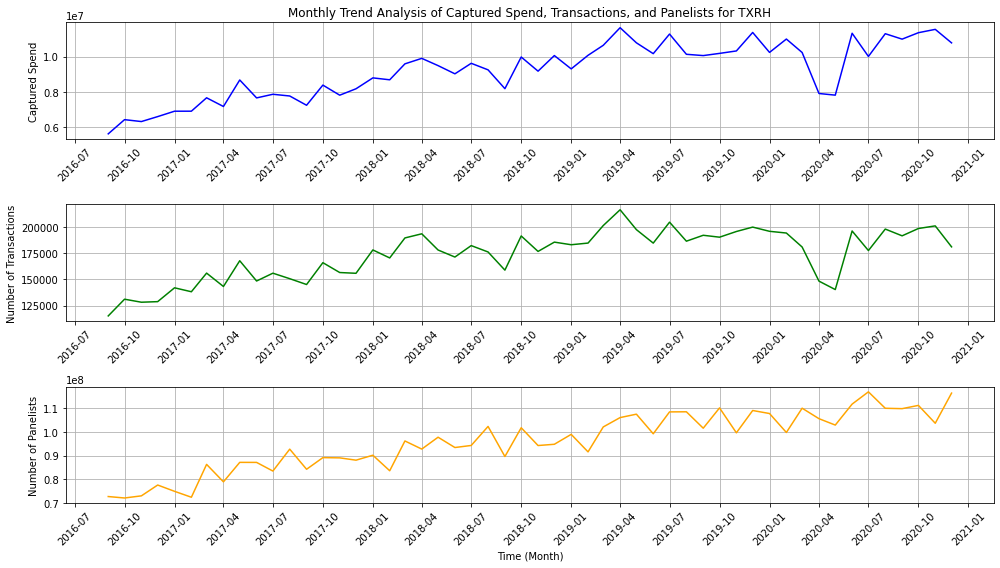

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_96927/643651257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_data['month'] = restaurant_data['optimized_transaction_date'].dt.to_period('M')


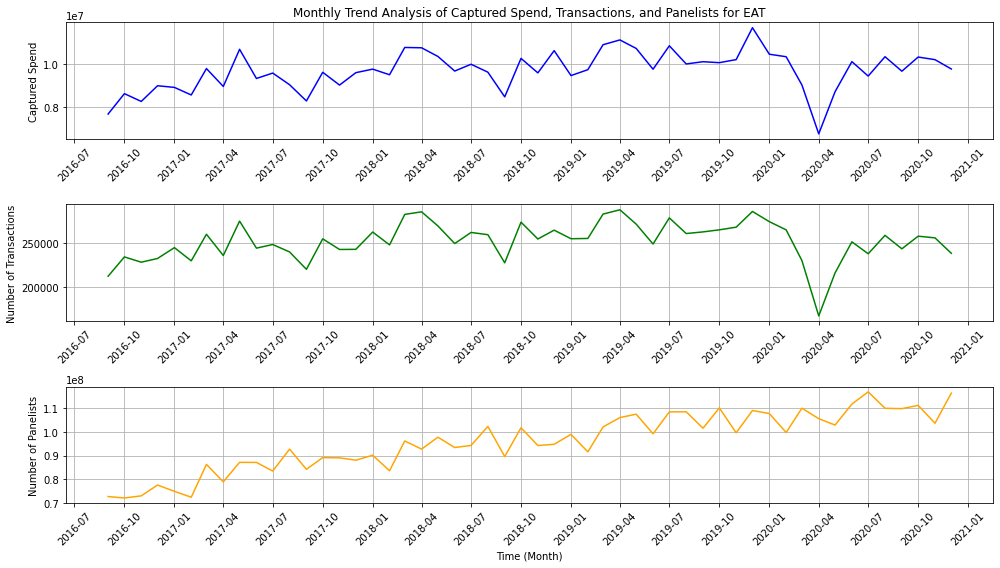

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_96927/643651257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_data['month'] = restaurant_data['optimized_transaction_date'].dt.to_period('M')


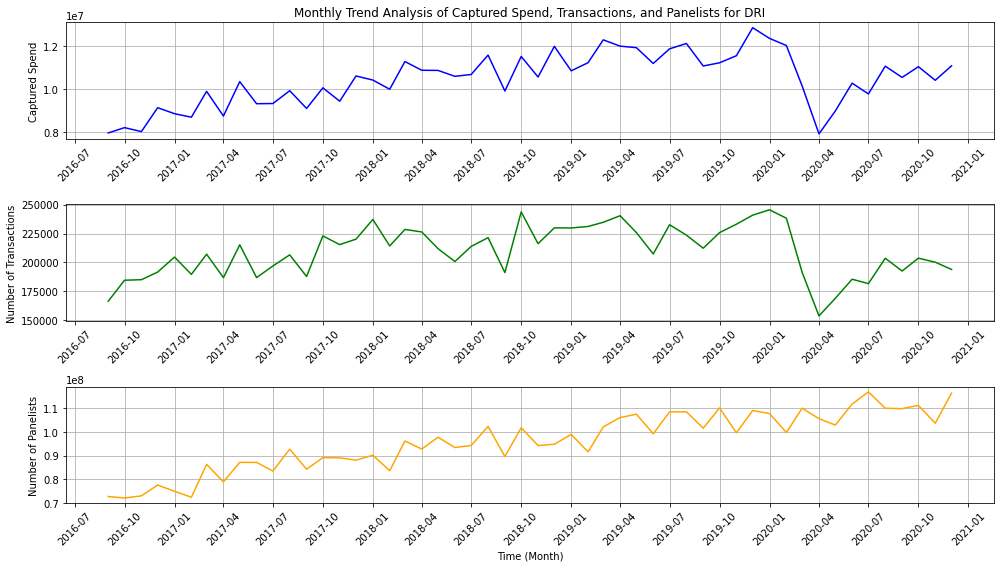

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_restaurant_trends_monthly(restaurant_data, restaurant_name):
    restaurant_data['month'] = restaurant_data['optimized_transaction_date'].dt.to_period('M')
    monthly_data = restaurant_data.groupby('month').agg({
        'captured_spend': 'sum',
        'num_txns': 'sum',
        'num_panelists': 'sum'
    }).reset_index()

    monthly_data['month'] = monthly_data['month'].dt.to_timestamp()

    fig, ax = plt.subplots(3, 1, figsize=(14, 8))

    ax[0].plot(monthly_data['month'], monthly_data['captured_spend'], label='Captured Spend', color='blue')
    ax[0].set_title(f'Monthly Trend Analysis of Captured Spend, Transactions, and Panelists for {restaurant_name}')
    ax[0].set_ylabel('Captured Spend')
    ax[0].grid(True)

    ax[1].plot(monthly_data['month'], monthly_data['num_txns'], label='Number of Transactions', color='green')
    ax[1].set_ylabel('Number of Transactions')
    ax[1].grid(True)

    ax[2].plot(monthly_data['month'], monthly_data['num_panelists'], label='Number of Panelists', color='orange')
    ax[2].set_xlabel('Time (Month)')
    ax[2].set_ylabel('Number of Panelists')
    ax[2].grid(True)

    for a in ax:
        a.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        a.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.setp(a.xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

restaurant_data_txrh = merged_data[merged_data['entity'] == 'TXRH']
restaurant_data_eat = merged_data[merged_data['entity'] == 'EAT']
restaurant_data_dri = merged_data[merged_data['entity'] == 'DRI']

plot_restaurant_trends_monthly(restaurant_data_txrh, 'TXRH')
plot_restaurant_trends_monthly(restaurant_data_eat, 'EAT')
plot_restaurant_trends_monthly(restaurant_data_dri, 'DRI')


# Monthly Growth rate (With respect to first value)

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_96927/1939787498.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_data['month'] = restaurant_data['optimized_transaction_date'].dt.to_period('M')
/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_96927/1939787498.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_data['month'] = restaurant_data['optimized_transaction_date'].dt.to_period('M')
/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_96927/193978749

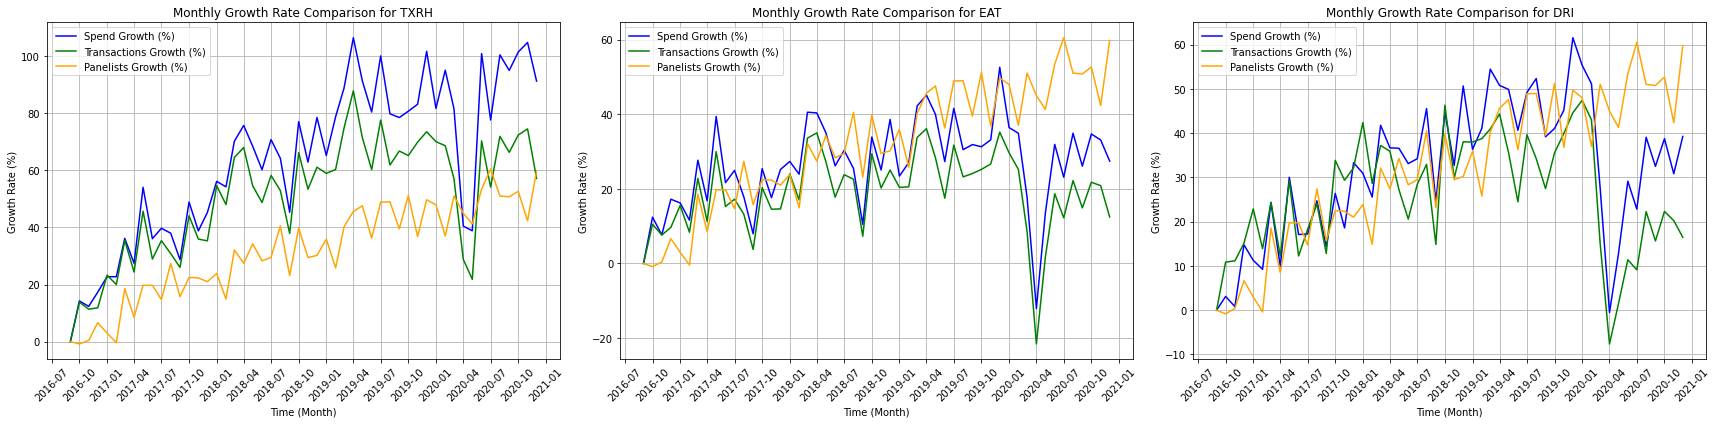

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_growth_rate_monthly(axes, restaurant_data, restaurant_name, ax_idx):
    restaurant_data['month'] = restaurant_data['optimized_transaction_date'].dt.to_period('M')
    monthly_data = restaurant_data.groupby('month').agg({
        'captured_spend': 'sum',
        'num_txns': 'sum',
        'num_panelists': 'sum'
    }).reset_index()
    monthly_data['month'] = monthly_data['month'].dt.to_timestamp()
    initial_values_monthly = monthly_data.iloc[0]
    monthly_data['spend_growth_base'] = (monthly_data['captured_spend'] / initial_values_monthly['captured_spend'] - 1) * 100
    monthly_data['txn_growth_base'] = (monthly_data['num_txns'] / initial_values_monthly['num_txns'] - 1) * 100
    monthly_data['panelists_growth_base'] = (monthly_data['num_panelists'] / initial_values_monthly['num_panelists'] - 1) * 100
    axes[ax_idx].plot(monthly_data['month'], monthly_data['spend_growth_base'], label='Spend Growth (%)', color='blue')
    axes[ax_idx].plot(monthly_data['month'], monthly_data['txn_growth_base'], label='Transactions Growth (%)', color='green')
    axes[ax_idx].plot(monthly_data['month'], monthly_data['panelists_growth_base'], label='Panelists Growth (%)', color='orange')
    axes[ax_idx].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    axes[ax_idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[ax_idx].tick_params(axis='x', rotation=45)
    axes[ax_idx].set_title(f'Monthly Growth Rate Comparison for {restaurant_name}')
    axes[ax_idx].set_xlabel('Time (Month)')
    axes[ax_idx].set_ylabel('Growth Rate (%)')
    axes[ax_idx].grid(True)
    axes[ax_idx].legend()
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
restaurant_data_txrh = merged_data[merged_data['entity'] == 'TXRH']
restaurant_data_eat = merged_data[merged_data['entity'] == 'EAT']
restaurant_data_dri = merged_data[merged_data['entity'] == 'DRI']
plot_growth_rate_monthly(axes, restaurant_data_txrh, 'TXRH', 0)
plot_growth_rate_monthly(axes, restaurant_data_eat, 'EAT', 1)
plot_growth_rate_monthly(axes, restaurant_data_dri, 'DRI', 2)

plt.tight_layout()

plt.savefig('growth_rate_comparison_restaurants.png', dpi=300)

plt.show()


# Quarterly Growth rate (With respect to first value)

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_52743/784497405.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_data['quarter'] = restaurant_data['optimized_transaction_date'].dt.to_period('Q')
/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_52743/784497405.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_data['quarter'] = restaurant_data['optimized_transaction_date'].dt.to_period('Q')
/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_52743/7844974

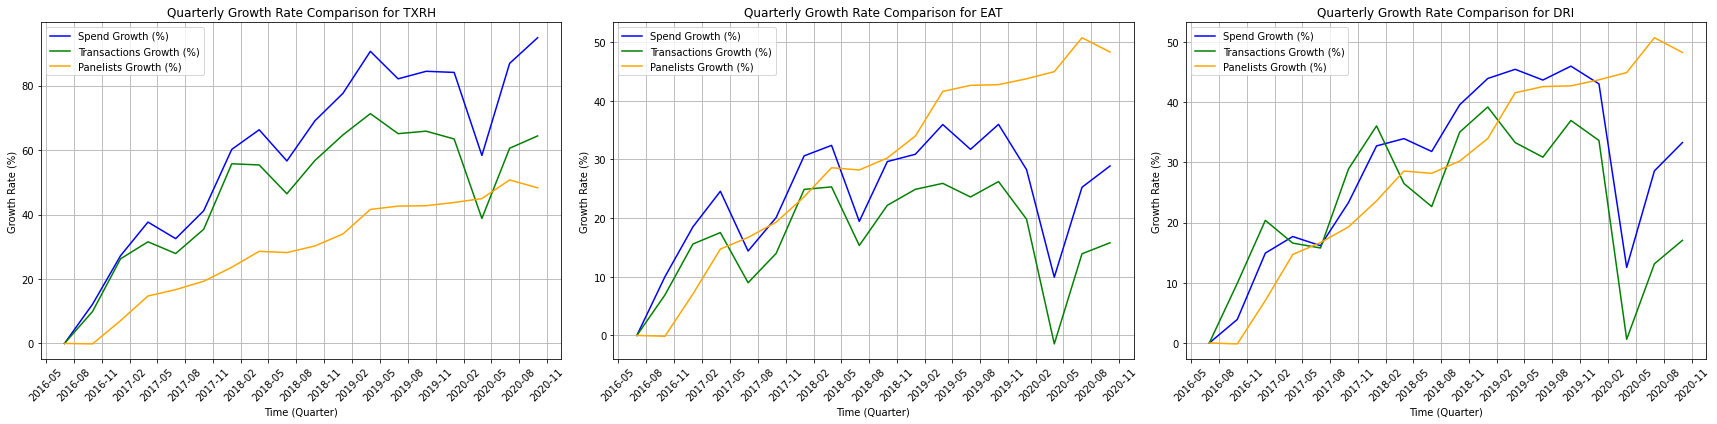

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_growth_rate_quarterly(axes, restaurant_data, restaurant_name, ax_idx):
    restaurant_data['quarter'] = restaurant_data['optimized_transaction_date'].dt.to_period('Q')
    quarterly_data = restaurant_data.groupby('quarter').agg({
        'captured_spend': 'mean',
        'num_txns': 'mean',
        'num_panelists': 'mean'
    }).reset_index()

    quarterly_data['quarter'] = quarterly_data['quarter'].dt.to_timestamp()

    initial_values_quarterly = quarterly_data.iloc[0]

    quarterly_data['spend_growth_base'] = (quarterly_data['captured_spend'] / initial_values_quarterly['captured_spend'] - 1) * 100
    quarterly_data['txn_growth_base'] = (quarterly_data['num_txns'] / initial_values_quarterly['num_txns'] - 1) * 100
    quarterly_data['panelists_growth_base'] = (quarterly_data['num_panelists'] / initial_values_quarterly['num_panelists'] - 1) * 100

    axes[ax_idx].plot(quarterly_data['quarter'], quarterly_data['spend_growth_base'], label='Spend Growth (%)', color='blue')
    axes[ax_idx].plot(quarterly_data['quarter'], quarterly_data['txn_growth_base'], label='Transactions Growth (%)', color='green')
    axes[ax_idx].plot(quarterly_data['quarter'], quarterly_data['panelists_growth_base'], label='Panelists Growth (%)', color='orange')

    axes[ax_idx].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    axes[ax_idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[ax_idx].tick_params(axis='x', rotation=45)

    axes[ax_idx].set_title(f'Quarterly Growth Rate Comparison for {restaurant_name}')
    axes[ax_idx].set_xlabel('Time (Quarter)')
    axes[ax_idx].set_ylabel('Growth Rate (%)')
    axes[ax_idx].grid(True)
    axes[ax_idx].legend()

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

restaurant_data_txrh = merged_data[merged_data['entity'] == 'TXRH']
restaurant_data_eat = merged_data[merged_data['entity'] == 'EAT']
restaurant_data_dri = merged_data[merged_data['entity'] == 'DRI']

plot_growth_rate_quarterly(axes, restaurant_data_txrh, 'TXRH', 0)
plot_growth_rate_quarterly(axes, restaurant_data_eat, 'EAT', 1)
plot_growth_rate_quarterly(axes, restaurant_data_dri, 'DRI', 2)

plt.tight_layout()

plt.savefig('quarterly_growth_rate_comparison_restaurants.png', dpi=300)

plt.show()


# Growth rate of spend per panist, txn per panelist and spend per txn

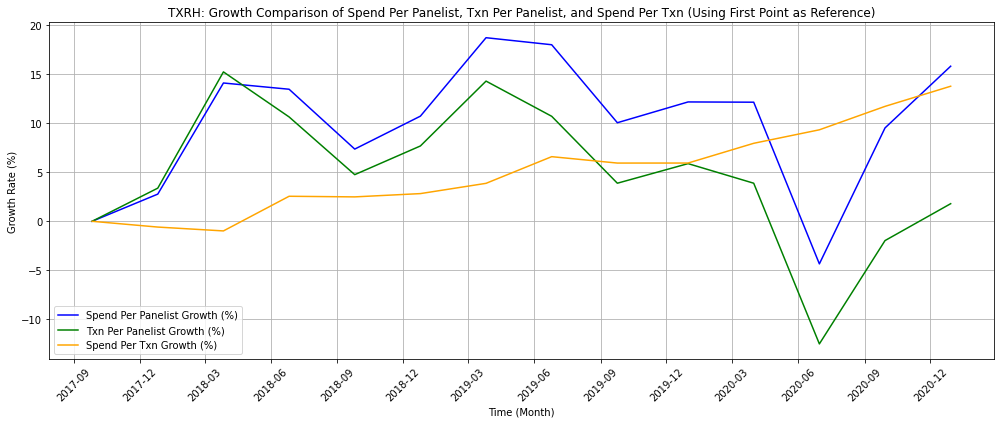

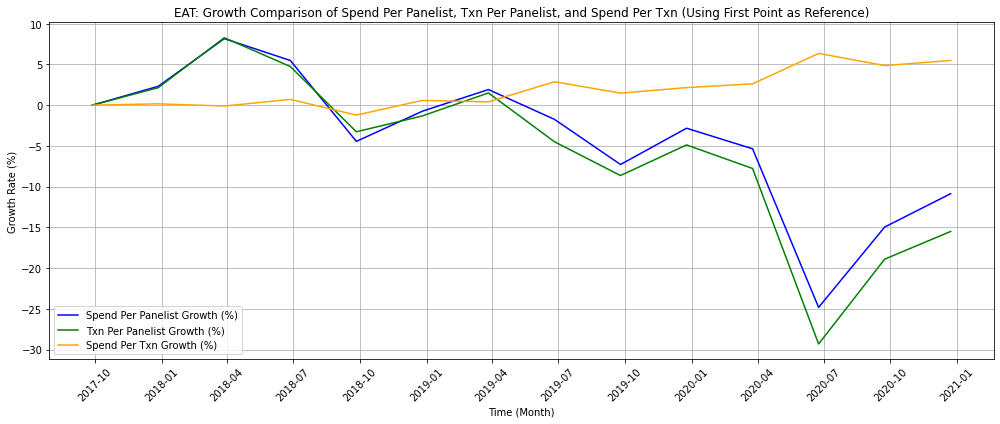

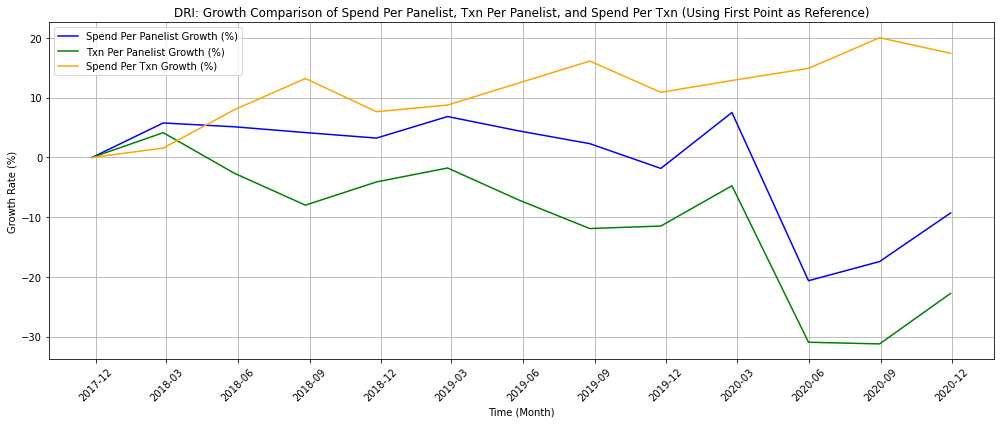

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

final_yoy_data['period_end_dt'] = pd.to_datetime(final_yoy_data['period_end_dt'])

def plot_growth_metrics_for_restaurant(restaurant_data, restaurant_name):
    restaurant_data = restaurant_data.sort_values(by='period_end_dt').reset_index(drop=True)
    
    initial_values = restaurant_data.iloc[0]
    
    restaurant_data['spend_per_panelist_growth'] = (restaurant_data['spend_per_panelist'] / initial_values['spend_per_panelist'] - 1) * 100
    restaurant_data['txn_per_panelist_growth'] = (restaurant_data['txn_per_panelist'] / initial_values['txn_per_panelist'] - 1) * 100
    restaurant_data['spend_per_txn_growth'] = (restaurant_data['spend_per_txn'] / initial_values['spend_per_txn'] - 1) * 100

    plt.figure(figsize=(14, 6))
    
    plt.plot(restaurant_data['period_end_dt'], restaurant_data['spend_per_panelist_growth'], label='Spend Per Panelist Growth (%)', color='blue')
    plt.plot(restaurant_data['period_end_dt'], restaurant_data['txn_per_panelist_growth'], label='Txn Per Panelist Growth (%)', color='green')
    plt.plot(restaurant_data['period_end_dt'], restaurant_data['spend_per_txn_growth'], label='Spend Per Txn Growth (%)', color='orange')

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

    plt.title(f'{restaurant_name}: Growth Comparison of Spend Per Panelist, Txn Per Panelist, and Spend Per Txn (Using First Point as Reference)')
    plt.xlabel('Time (Month)')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

data_txrh = final_yoy_data[final_yoy_data['entity'] == 'TXRH']
data_eat = final_yoy_data[final_yoy_data['entity'] == 'EAT']
data_dri = final_yoy_data[final_yoy_data['entity'] == 'DRI']

plot_growth_metrics_for_restaurant(data_txrh, 'TXRH')
plot_growth_metrics_for_restaurant(data_eat, 'EAT')
plot_growth_metrics_for_restaurant(data_dri, 'DRI')


# Correlation Heatmap

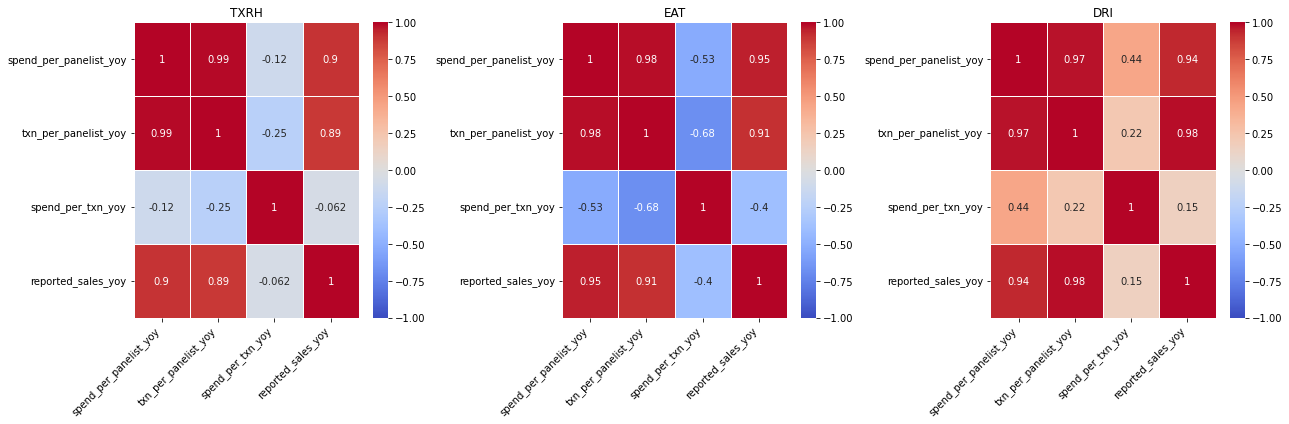

Image saved as 'heatmaps_side_by_side.png'


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmap(ax, restaurant_data, restaurant_name):
    correlation_data = restaurant_data[['spend_per_panelist_yoy', 'txn_per_panelist_yoy', 'spend_per_txn_yoy', 'reported_sales_yoy']]
    correlation_data = correlation_data.dropna()
    correlation_matrix = correlation_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(f'{restaurant_name}')

txrh_data = final_yoy_data[final_yoy_data['entity'] == 'TXRH']
eat_data = final_yoy_data[final_yoy_data['entity'] == 'EAT']
dri_data = final_yoy_data[final_yoy_data['entity'] == 'DRI']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

create_heatmap(axes[0], txrh_data, "TXRH")
create_heatmap(axes[1], eat_data, "EAT")
create_heatmap(axes[2], dri_data, "DRI")

plt.tight_layout()
plt.savefig('heatmaps_side_by_side.png', dpi=300)
plt.show()

print("Image saved as 'heatmaps_side_by_side.png'")


# YOY: spend per panelist, txn per panelist and reported sales for each resto. The plots below are after making the forecast so it includes the forecast

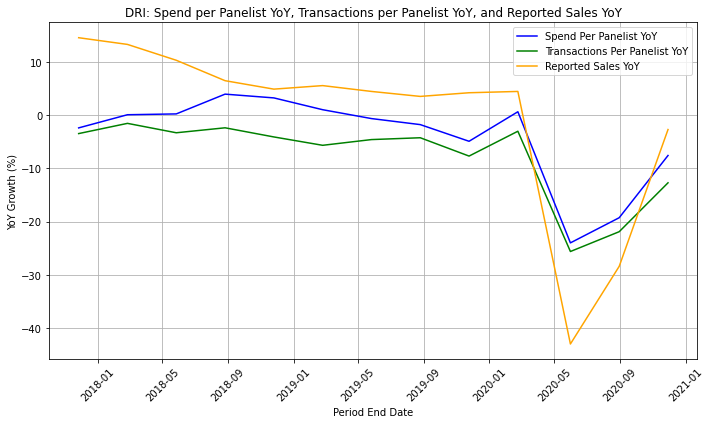

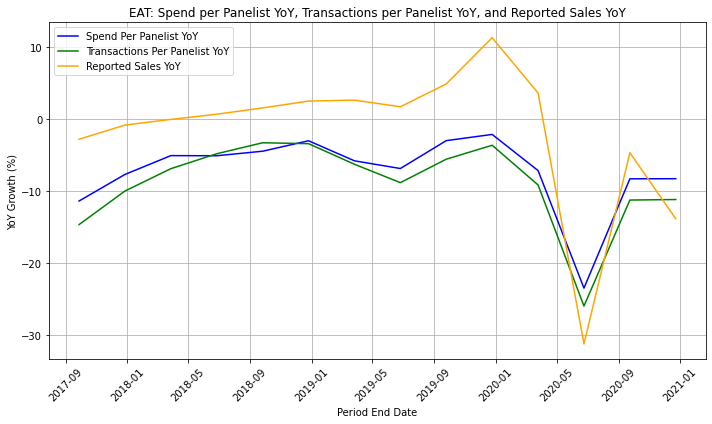

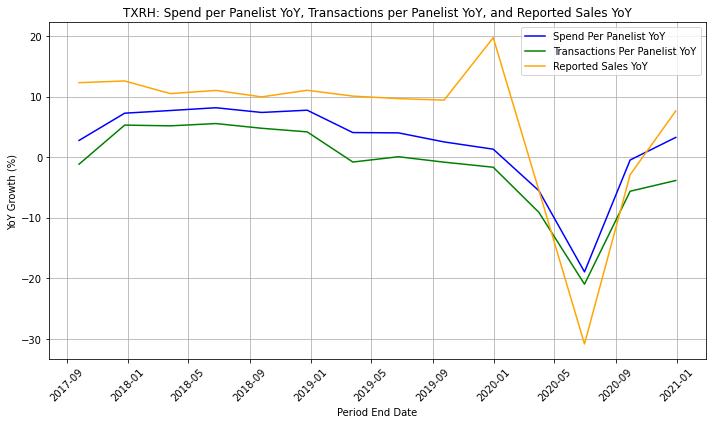

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (replace 'final_yoy.xlsx' with the correct path to your file)
df = pd.read_excel('final yoy.xlsx')

# Fill missing values for each restaurant
df.loc[(df['entity'] == 'EAT') & df['reported_sales_yoy'].isnull(), 'reported_sales_yoy'] = -0.1384
df.loc[(df['entity'] == 'DRI') & df['reported_sales_yoy'].isnull(), 'reported_sales_yoy'] = -0.0271
df.loc[(df['entity'] == 'TXRH') & df['reported_sales_yoy'].isnull(), 'reported_sales_yoy'] = 0.0763

# Multiply the 'reported_sales_yoy' column by 100 to convert to percentage
df['reported_sales_yoy'] = df['reported_sales_yoy'] * 100

# Convert the 'period_end_dt' column to datetime
df['period_end_dt'] = pd.to_datetime(df['period_end_dt'])

# List of unique restaurants
restaurants = df['entity'].unique()

# Loop through each restaurant and plot
for restaurant in restaurants:
    # Filter data for the current restaurant
    restaurant_data = df[df['entity'] == restaurant]
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    
    # Plot Spend per Panelist YoY
    plt.plot(restaurant_data['period_end_dt'], restaurant_data['spend_per_panelist_yoy'], label='Spend Per Panelist YoY', color='blue')
    
    # Plot Transactions per Panelist YoY
    plt.plot(restaurant_data['period_end_dt'], restaurant_data['txn_per_panelist_yoy'], label='Transactions Per Panelist YoY', color='green')
    
    # Plot Reported Sales YoY
    plt.plot(restaurant_data['period_end_dt'], restaurant_data['reported_sales_yoy'], label='Reported Sales YoY', color='orange')
    
    # Add titles and labels
    plt.title(f'{restaurant}: Spend per Panelist YoY, Transactions per Panelist YoY, and Reported Sales YoY')
    plt.xlabel('Period End Date')
    plt.ylabel('YoY Growth (%)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Save the plot as a PNG image with 300 dpi
    plt.tight_layout()
    plt.savefig(f'{restaurant}_yoy_growth_plot.png', dpi=300)
    
    # Show plot
    plt.show()

# Save the modified data to an Excel file if needed
df.to_excel('updated_final_yoy_data.xlsx', index=False)
